# PCA (Principal compoent Analysis)

In [ ]:
#creating dataset:
import numpy as np
X=np.array([[1,3,5,7,9,13,20,20,21,24,26],[5,7,11,14,15,17,18,19,21,22,26]])
X=X.T
X

array([[ 1,  5],
       [ 3,  7],
       [ 5, 11],
       [ 7, 14],
       [ 9, 15],
       [13, 17],
       [20, 18],
       [20, 19],
       [21, 21],
       [24, 22],
       [26, 26]])

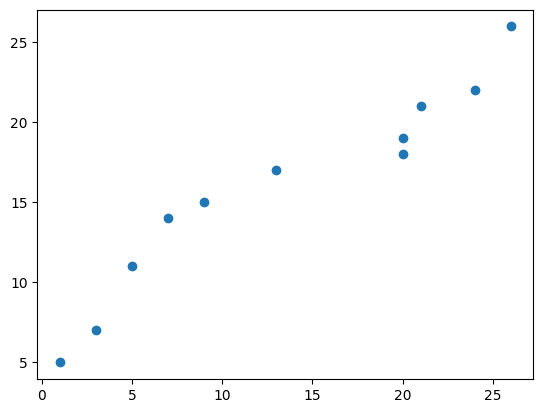

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1]) #1st column on x-axis & 2nd column on y-axis

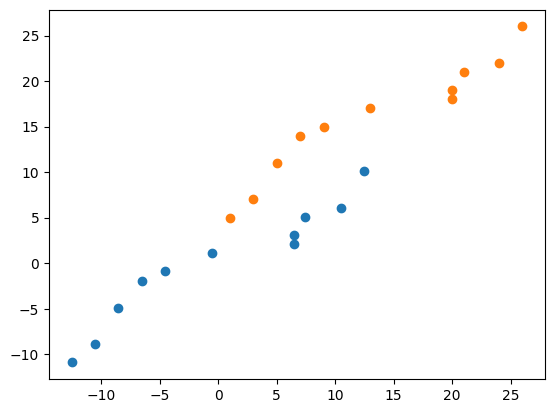

In [ ]:
#normalize data by shifting to origin(zero)
X_meaned=X-np.mean(X, axis=0)
plt.scatter(X_meaned[:,0],X_meaned[:,1])
plt.scatter(X[:,0],X[:,1])

In [ ]:
C = np.cov(X_meaned, rowvar=False) #covariance matrix (2x2 symetric matrix)
C

array([[80.87272727, 54.95454545],
       [54.95454545, 40.69090909]])

In [ ]:
eval, evec= np.linalg.eig(C)
print(eval)
print(evec)

[119.29375452   2.26988184]
[[ 0.81956216 -0.57299028]
 [ 0.57299028  0.81956216]]


In [ ]:
#sort eigen values in descending order
sorted_index=np.argsort(eval)[::-1] #but here already sorted
sorted_eval=eval[sorted_index]
sorted_evec=evec[sorted_index]

In [ ]:
#we want 1D from 2D data
n= 1
evec_subset=sorted_evec[:,0:n] #take only principal eigen vector
print(evec_subset)  #evecor corresponding to largest evalue

[[0.81956216]
 [0.57299028]]


In [ ]:
#transform data
X_reduced= np.dot(evec_subset.T, X_meaned.T).transpose() #.transpose()==.T
print(X_reduced)

[[-16.53258291]
 [-13.74747803]
 [ -9.81639259]
 [ -6.45829743]
 [ -4.24618282]
 [  0.17804639]
 [  6.48797183]
 [  7.0609621 ]
 [  9.02650482]
 [ 12.05818159]
 [ 15.98926703]]


In [ ]:
### METHOD-2, using sklearn library
from sklearn.decomposition import PCA
pca=PCA(n_components=1) #want to reduce to 1D
pca.fit(X_meaned) #it learn eval & evec from original data
Xr=pca.transform(X_meaned) #projected data
print(Xr)

[[ 16.53258291]
 [ 13.74747803]
 [  9.81639259]
 [  6.45829743]
 [  4.24618282]
 [ -0.17804639]
 [ -6.48797183]
 [ -7.0609621 ]
 [ -9.02650482]
 [-12.05818159]
 [-15.98926703]]


**Problem: Fisher's Iris dataset**
*   3 classes (50 samples of each)
*   4 features: Petal length(y1), Petal width(y2), Sepal length(y3), Sepal width(y4)  i.e. **IR^4** (4D).
*   **D = 150x4 (original feature vector)**
*   covariance matrix = 4x4 (4 eigen values).
*   objective is to reduce to 2D (Y1, Y2). Y1,Y2 are linear combinations of original feature voctors yi's with evectors.
--> **150x2 (Transformed feature vector)**


In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
iris.get('feature_names') #to see the data

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
iris.target #50 of each class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

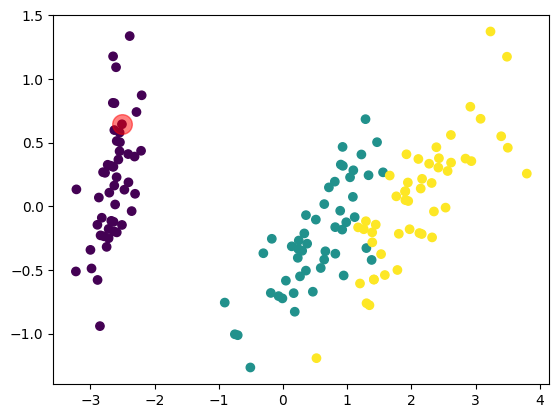

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
pca.fit(iris.data)
X= pca.transform(iris.data)

plt.scatter(X[:,0], X[:,1], c=iris.target)
plt.scatter([X[10][0]], [X[10][1]], s=[200], c=["r"], alpha=0.5)

Now visualization is easy in 2 dimention data

# (Linear Discriminant analysis)

(2, 14)


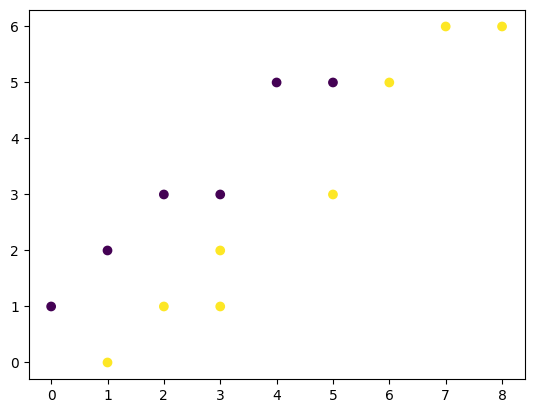

In [ ]:
# define the dataset:
import numpy as np
import matplotlib.pyplot as plt
X=np.array([[0,1,2,3,4,5,1,2,3,3,5,6,7,8],[1,2,3,3,5,5,0,1,1,2,3,5,6,6]])
print(X.shape)
y=np.array([0,0,0,0,0,0,1,1,1,1,1,1,1,1]) # class information = binary classification
X=X.T
plt.scatter(X[:,0],X[:,1],c=y)

In [ ]:
# let's apply PCA first
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
pca.fit(X)
Xr=pca.transform(X)
print(Xr)

[[-4.07140709]
 [-2.6633141 ]
 [-1.25522111]
 [-0.48545908]
 [ 1.56096488]
 [ 2.3307269 ]
 [-3.93997604]
 [-2.53188305]
 [-1.76212102]
 [-1.12379005]
 [ 1.05406496]
 [ 3.10048893]
 [ 4.50858192]
 [ 5.27834394]]


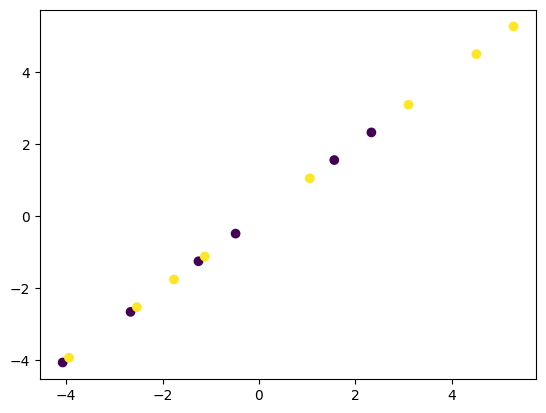

In [ ]:
plt.scatter(Xr[:,0],Xr[:,0],c=y)

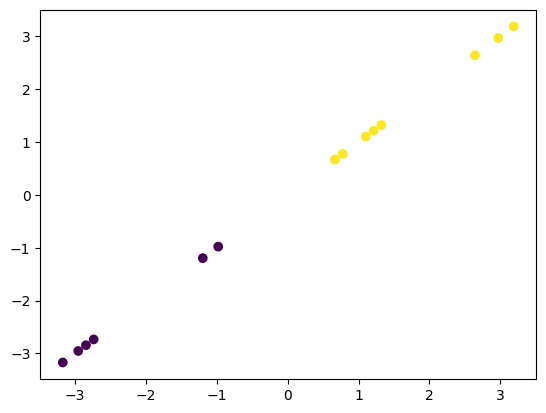

In [ ]:
# above one is not liearnly separable
# apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
X_lda=lda.fit_transform(X,y)
plt.scatter(X_lda[:,0],X_lda[:,0], c=y)

In [ ]:
# now the two classes above are linearly separable into two clusters
print(Xr.T)  #PCA
print(X_lda.T) #LDA

[[-4.07140709 -2.6633141  -1.25522111 -0.48545908  1.56096488  2.3307269
  -3.93997604 -2.53188305 -1.76212102 -1.12379005  1.05406496  3.10048893
   4.50858192  5.27834394]]
[[-2.73733275 -2.84638529 -2.95543783 -0.97995297 -3.17354291 -1.19805805
   1.32268952  1.21363698  3.18912185  1.10458444  2.97101677  0.77742682
   0.66837428  2.64385915]]


**EX: WINE DATASET**


In [ ]:
!pip install scikit-learn

In [ ]:
import sklearn.datasets
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
wine=load_wine()
X=np.array(wine.data)
y=np.array(wine.target)

print(X.shape)
print(y.shape)
print(X[1:5,:]) #print 1st 5 rows & all the columns.
print(y)

(178, 13)
(178,)
[[1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
#you can see the wine data
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

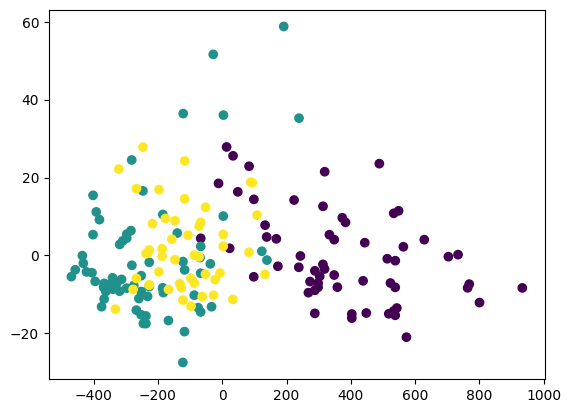

In [ ]:
# let's first apply PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
result=pca.fit(X)
Z=result.transform(X)
plt.scatter(Z[:,0],Z[:,1], c=y)

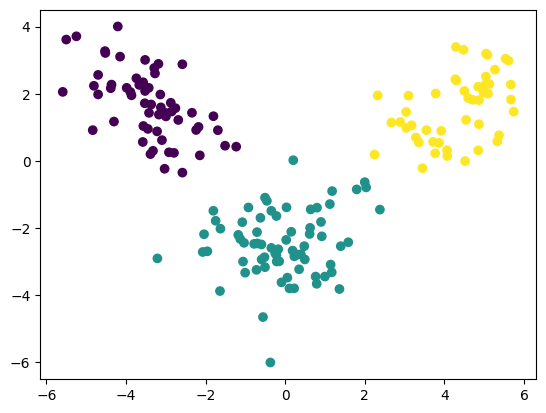

In [ ]:
#now let's apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
X_lda=lda.fit_transform(X,y)
plt.scatter(X_lda[:,0],X_lda[:,1],c=y)

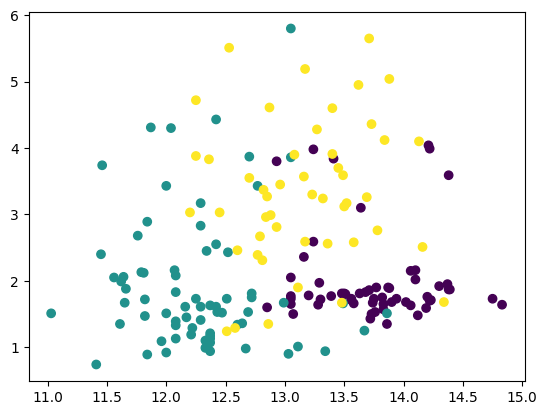

In [ ]:
#you can also plot original data
plt.scatter(X[:,0],X[:,1],c=y)

In [ ]:
# we can also use for classification
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3) #let 70% data for training

# lda.fit(xtrain,ytrain)  #training of data

# yn=lda.predict(xtest)  #predicted data

# print(ytest)
# print(yn)
# print(ytest-yn)
##(error is diffiredt while done together and separate in below)

In [ ]:
lda.fit(xtrain,ytrain)

LinearDiscriminantAnalysis()

In [ ]:
yn=lda.predict(xtest)

In [ ]:
print(ytest)
print(yn)
print(ytest-yn)  #100% accuracy

[1 1 0 1 0 1 1 2 1 2 1 1 2 2 2 1 1 1 1 1 0 1 0 1 0 2 0 2 0 2 0 1 0 1 2 2 1
 2 2 0 1 2 2 1 1 0 2 1 0 2 1 1 1 0]
[1 1 0 1 0 1 1 2 1 2 1 1 2 2 2 1 1 1 1 1 0 1 0 1 0 2 0 2 0 2 0 1 0 1 2 2 1
 2 2 0 1 2 2 1 1 0 2 1 0 2 1 1 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Linear and multiple Regression


## Ex1: simple linear regression;
  score = f(hours)+error trm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# loading data:
from google.colab import files
uploaded=files.upload()

Saving student_scores.xlsx to student_scores.xlsx


In [ ]:
scores=pd.read_csv("student_scores.xlsx")
scores.shape

(16, 2)

In [ ]:
scores

,hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,50
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,37


In [ ]:
scores.describe()

,hours,scores
count,16.000000,16.000000
mean,5.087500,53.000000
std,2.730781,25.899807
min,1.100000,17.000000
25%,3.075000,34.500000
50%,4.800000,48.500000
75%,7.850000,76.500000
max,9.200000,95.000000


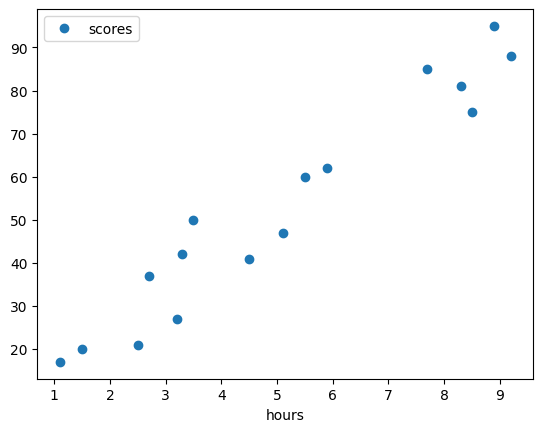

In [ ]:
scores.plot(x='hours',y='scores',style='o')
plt.show()

In [ ]:
x=scores.iloc[:,:-1].values
y=scores.iloc[:,1].values

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x,y)

LinearRegression()

In [ ]:
print(reg.intercept_)
print(reg.coef_)

6.321849227812152
[9.17506649]


scores=6.3218+9.1750*hour

In [ ]:
y_pred=reg.predict(x)

In [ ]:
df=pd.DataFrame({'Actual':y,'Predicted':y_pred})
df

,Actual,Predicted
0,21,29.259515
1,47,53.114688
2,27,35.682062
3,75,84.309914
4,50,38.434582
5,20,20.084449
6,88,90.732461
7,60,56.784715
8,81,82.474901
9,37,31.094529


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print('MSE:%.2f' % mean_squared_error(y,y_pred))

MSE:40.35


In [ ]:
print('r2_score:%.2f' % r2_score(y,y_pred))

r2_score:0.94


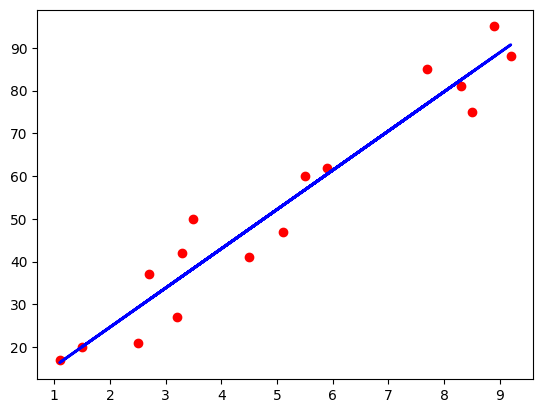

In [ ]:
plt.scatter(x,y,color='red')
plt.plot(x,y_pred,color='blue',linewidth=2)
plt.show()

## EX-2: multiple Linear Regression;

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
startups = pd.read_csv("50_Startups.csv")
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
# preparing data
# x=startups.drop('Profit',axis=1)  # 50x3
x=startups.iloc[:, [0,1,2]]
y=startups['Profit']      #50x1
print(x,y)


    R&D Spend  Administration  Marketing Spend
0   165349.20       136897.80        471784.10
1   162597.70       151377.59        443898.53
2   153441.51       101145.55        407934.54
3   144372.41       118671.85        383199.62
4   142107.34        91391.77        366168.42
5   131876.90        99814.71        362861.36
6   134615.46       147198.87        127716.82
7   130298.13       145530.06        323876.68
8   120542.52       148718.95        311613.29
9   123334.88       108679.17        304981.62
10  101913.08       110594.11        229160.95
11  100671.96        91790.61        249744.55
12   93863.75       127320.38        249839.44
13   91992.39       135495.07        252664.93
14  119943.24       156547.42        256512.92
15  114523.61       122616.84        261776.23
16   78013.11       121597.55        264346.06
17   94657.16       145077.58        282574.31
18   91749.16       114175.79        294919.57
19   86419.70       153514.11             0.00
20   76253.86

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20) #what to take random

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
# print parameters
print(regressor.intercept_)
print(regressor.coef_)

49083.915529528516
[ 0.82771073 -0.03411402  0.02830532]


In [ ]:
# making predictions:
y_pred=regressor.predict(x_test) #on unseen data

In [ ]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
12,141585.52,129504.323498
14,132602.65,150282.440404
4,166187.94,173954.458783
8,152211.77,152605.164956
45,64926.08,45730.348656
1,191792.06,191068.367648
25,107404.34,101751.946471
24,108552.04,113446.198493
47,42559.73,44463.958835
23,108733.99,110000.298357


In [ ]:
# the coefficients
from sklearn.metrics import mean_squared_error, r2_score
print('Coefficients: \n',regressor.coef_)
# the mean suqared error
print('Mean suqared error: %.2f'% mean_squared_error(y_test,y_pred))
# coefficient of determination
print('R^2 score: %.2f' %r2_score(y_test,y_pred))

Coefficients: 
 [ 0.82771073 -0.03411402  0.02830532]
Mean suqared error: 94913566.80
R^2 score: 0.95


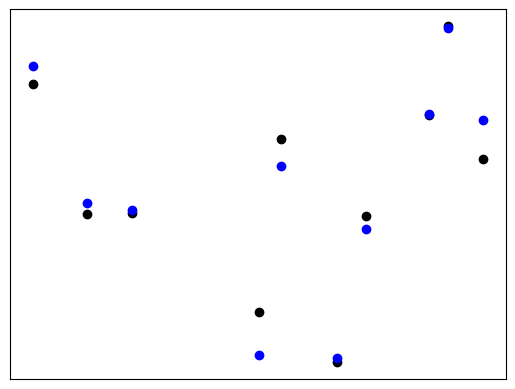

In [ ]:
# plot outputs
plt.scatter(x_test['Administration'],y_test,color='black')
plt.scatter(x_test['Administration'],y_pred,color='blue')

plt.xticks(())
plt.yticks(())
plt.show()

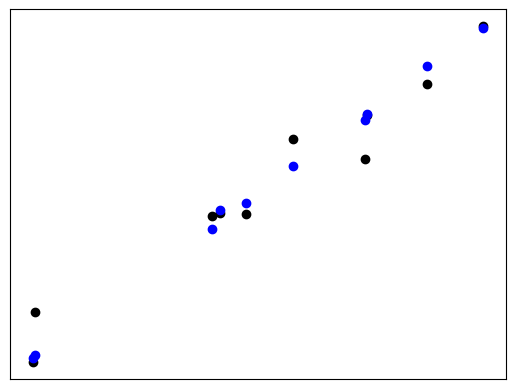

In [ ]:
# plot outputs
plt.scatter(x_test['R&D Spend'],y_test,color='black')
plt.scatter(x_test['R&D Spend'],y_pred,color='blue')

plt.xticks(())
plt.yticks(())
plt.show()

## EX-3: Polynomial Regression

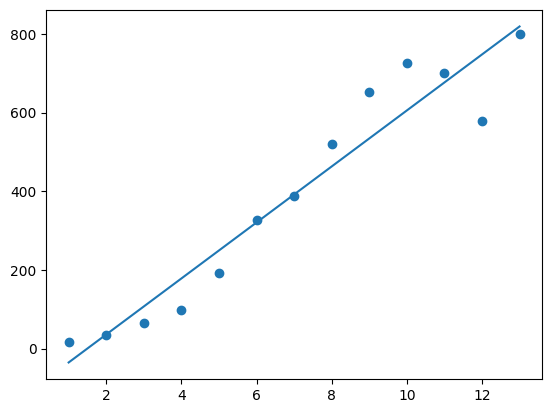

R^2 score is:0.92
Mean squared error: 5798.12


In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import r2_score, mean_squared_error

x=[1,2,3,4,5,6,7,8,9,10,11,12,13]
y=[16.08,33.83,65.8,97.2,191.55,326.20,386.87,520.03,651.92,724.93,699.50,578.26,799.12]

mymodel=numpy.poly1d(numpy.polyfit(x,y,1))

myline=numpy.linspace(1,13,100)

plt.scatter(x,y)
plt.plot(myline,mymodel(myline))
plt.show()
print('R^2 score is:%.2f' % r2_score(y,mymodel(x)))
print('Mean squared error: %.2f' % mean_squared_error(y,mymodel(x)))

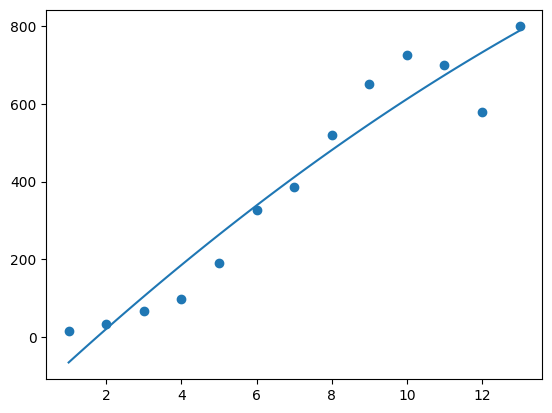

R^2 score is:0.93
Mean squared error: 5504.47


In [ ]:
# now for 2 degree polynimial:
import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import r2_score, mean_squared_error

x=[1,2,3,4,5,6,7,8,9,10,11,12,13]
y=[16.08,33.83,65.8,97.2,191.55,326.20,386.87,520.03,651.92,724.93,699.50,578.26,799.12]

mymodel=numpy.poly1d(numpy.polyfit(x,y,2))

myline=numpy.linspace(1,13,100)

plt.scatter(x,y)
plt.plot(myline,mymodel(myline))
plt.show()
print('R^2 score is:%.2f' % r2_score(y,mymodel(x)))
print('Mean squared error: %.2f' % mean_squared_error(y,mymodel(x)))

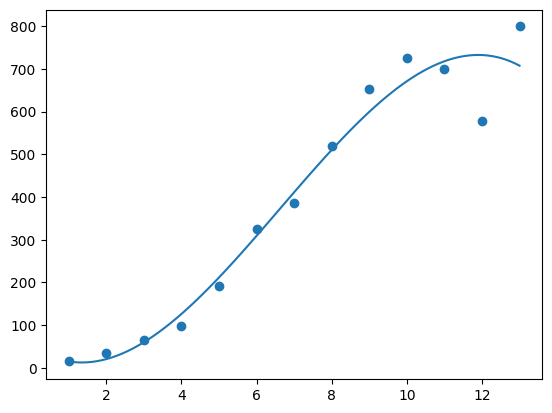

R^2 score is:0.96
Mean squared error: 3122.60


In [ ]:
# let' use 3 degree polynomial
import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import r2_score, mean_squared_error

x=[1,2,3,4,5,6,7,8,9,10,11,12,13]
y=[16.08,33.83,65.8,97.2,191.55,326.20,386.87,520.03,651.92,724.93,699.50,578.26,799.12]

mymodel=numpy.poly1d(numpy.polyfit(x,y,3))

myline=numpy.linspace(1,13,100)

plt.scatter(x,y)
plt.plot(myline,mymodel(myline))
plt.show()
print('R^2 score is:%.2f' % r2_score(y,mymodel(x)))
print('Mean squared error: %.2f' % mean_squared_error(y,mymodel(x)))

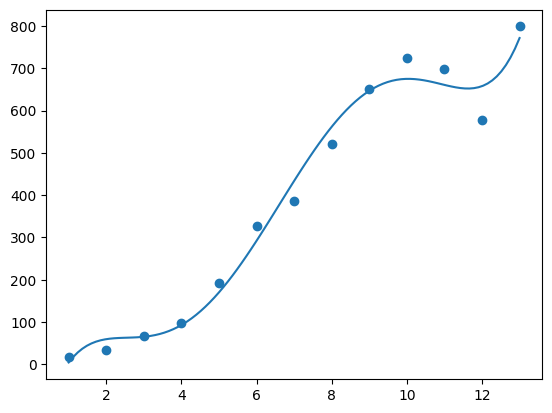

R^2 score is:0.98
Mean squared error: 1342.80


In [ ]:
# 5 degree
import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import r2_score, mean_squared_error

x=[1,2,3,4,5,6,7,8,9,10,11,12,13]
y=[16.08,33.83,65.8,97.2,191.55,326.20,386.87,520.03,651.92,724.93,699.50,578.26,799.12]

mymodel=numpy.poly1d(numpy.polyfit(x,y,5))

myline=numpy.linspace(1,13,100)

plt.scatter(x,y)
plt.plot(myline,mymodel(myline))
plt.show()
print('R^2 score is:%.2f' % r2_score(y,mymodel(x)))
print('Mean squared error: %.2f' % mean_squared_error(y,mymodel(x)))

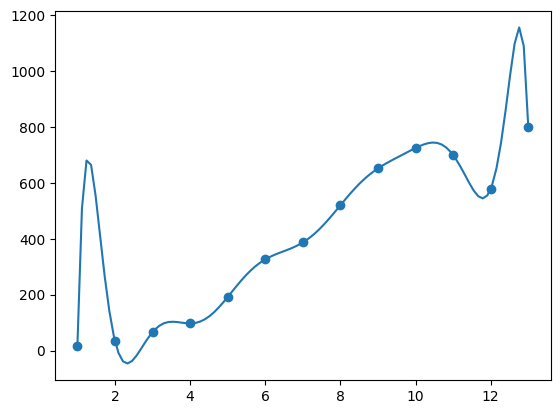

R^2 score is:1.00
Mean squared error: 0.00


In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import r2_score, mean_squared_error

x=[1,2,3,4,5,6,7,8,9,10,11,12,13]
y=[16.08,33.83,65.8,97.2,191.55,326.20,386.87,520.03,651.92,724.93,699.50,578.26,799.12]

mymodel=numpy.poly1d(numpy.polyfit(x,y,12))

myline=numpy.linspace(1,13,100)

plt.scatter(x,y)
plt.plot(myline,mymodel(myline))
plt.show()
print('R^2 score is:%.2f' % r2_score(y,mymodel(x)))
print('Mean squared error: %.2f' % mean_squared_error(y,mymodel(x)))

zero error, 100% fit but overfitting which will cause wrong prediction

# Logistic Regression

## EX-1: Company datasetb(user data)
dataset contains inforamation of users from a company database; userID,Gender,Age,Estimated salary,Purchased. **To predict that a user will purchage the company's newly launched product or not?**  
it needs to find relationship between age & estimated salary. here userid & gender are not imp.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving user_dataset.csv to user_dataset.csv


In [ ]:
dataset=pd.read_csv("user_dataset.csv")
print(dataset.shape)
dataset.head()

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# input/feature
x=dataset.iloc[:,[2,3]].values
# output/target
y=dataset.iloc[:,4].values
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


In [ ]:
# dataset preparation:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0) #what to take random

In [ ]:
# shift data to zero mean & one standard deviation i.e., NORMALIZATION
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

print(x_train[0:10,:])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)

print(cm)
print("Accuracy: ",accuracy_score(y_test,y_pred))

[[65  3]
 [ 8 24]]
Accuracy:  0.89


from above; for class-0: out of 68 samples,65 are correctly classified & 3 are incorrectly classified.   
for class-1: out of 32 samples,24 are correctly classified & 8 are incorrectly classified.

## EX-2:

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


total 8 classes and total 1348 images of size 62x47

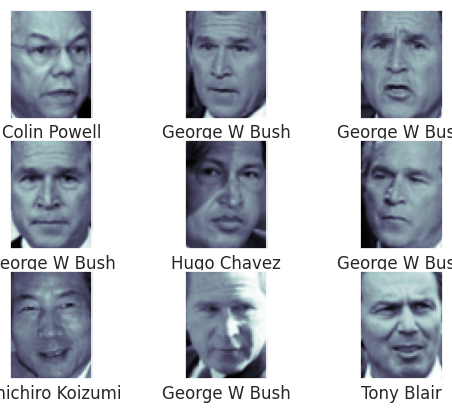

In [ ]:
# let's plot few of them
fig,ax=plt.subplots(3,3)
for i,axi in enumerate(ax.flat):
  axi.imshow(faces.images[i],cmap='bone')
  axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)

# splitting the training and testing data
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(faces.data,faces.target,random_state=42)

model.fit(Xtrain,ytrain)

yfit=model.predict(Xtest)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 0.98, 'Predicted names; Incorrect labels in red')

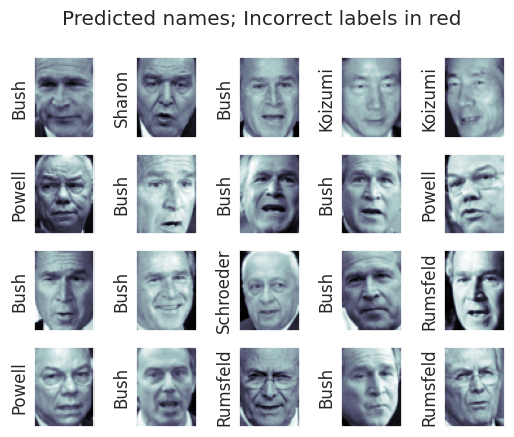

In [ ]:
# some test pattern with their prediction
fig,ax=plt.subplots(4,5)
for i,axi in enumerate(ax.flat):
  axi.imshow(Xtest[i].reshape(62,47),cmap='bone')
  axi.set(xticks=[],yticks=[])
  axi.set_ylabel(faces.target_names[yfit[i]].split()[-1])

fig.suptitle('Predicted names; Incorrect labels in red',) #incomplete code line

In [ ]:
# classification repot:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(ytest,yfit,target_names=faces.target_names))
print(confusion_matrix(ytest,yfit))

                   precision    recall  f1-score   support

     Ariel Sharon       0.61      0.73      0.67        15
     Colin Powell       0.88      0.87      0.87        68
  Donald Rumsfeld       0.80      0.65      0.71        31
    George W Bush       0.85      0.87      0.86       126
Gerhard Schroeder       0.64      0.78      0.71        23
      Hugo Chavez       0.92      0.60      0.73        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.86      0.84        42

         accuracy                           0.82       337
        macro avg       0.80      0.79      0.79       337
     weighted avg       0.83      0.82      0.82       337

[[ 11   0   2   1   1   0   0   0]
 [  1  59   1   5   0   0   0   2]
 [  1   3  20   5   0   0   0   2]
 [  2   5   2 109   4   1   1   2]
 [  2   0   0   1  18   0   1   1]
 [  0   0   0   2   5  12   0   1]
 [  0   0   0   0   0   0  12   0]
 [  1   0   0   5   0   0   0  36]]


# classification matrics
confusion matix

In [ ]:
from sklearn import metrics

y_actual=["c","h","f","c","h","f","c","h","h"]
y_pred=["c","c","f","h","h","c","c","f","f"]

cm=metrics.confusion_matrix(y_actual,y_pred,labels=["c","h","f"])
cm

array([[2, 1, 0],
       [1, 1, 2],
       [1, 0, 1]])

1st row: out of 3 cricket player, 2 are correctly classified & 1 is incorrectly classified to hockey.  
1st column: total 4 players are classified as cricket (actual was 3).

In [ ]:
cm=metrics.classification_report(y_actual,y_pred,labels=["c","h","f"])
print(cm)

              precision    recall  f1-score   support

           c       0.50      0.67      0.57         3
           h       0.50      0.25      0.33         4
           f       0.33      0.50      0.40         2

    accuracy                           0.44         9
   macro avg       0.44      0.47      0.43         9
weighted avg       0.46      0.44      0.43         9

